## Seaborn Visualization Basics

* Use seaborn >= 0.9.0
* "train1.csv" was downloaded from: https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/
* "train2.csv" was downloaded from: https://datahack.analyticsvidhya.com/contest/enigma-codefest-machine-learning-1/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [2]:
df1 = pd.read_csv('train1.csv')
print(df1.shape)
df1.head()

(54808, 14)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
df2 = pd.read_csv('train2.csv')
print(df2.shape)
df2.head()

(330045, 7)


,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


### Scatterplot

* Just to plot 2 features

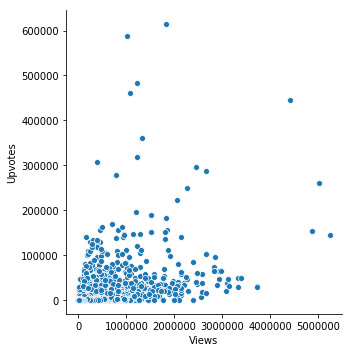

In [4]:
sns.relplot(x="Views", y="Upvotes", data = df2)

### Hue Plot

* It adds 1 more dimension on scatter plot
* `hue` can be the label or other attributes, indicating the added dimension
* `size` allows you to change the size of the dots
* Better to use `hue` and `size` on the same attribute

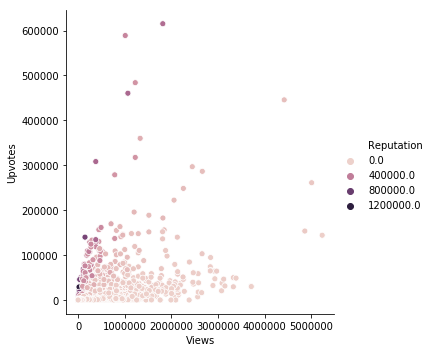

In [7]:
# Adding "Reputation" into the dimension
sns.relplot(x="Views", y="Upvotes", hue = "Reputation", data = df2)

This indicates that reputation is affected by upvotes than views

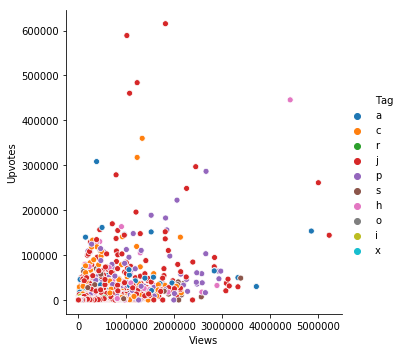

In [9]:
# Adding "Tag" into the dimension
sns.relplot(x="Views", y="Upvotes", hue = "Tag", data = df2)

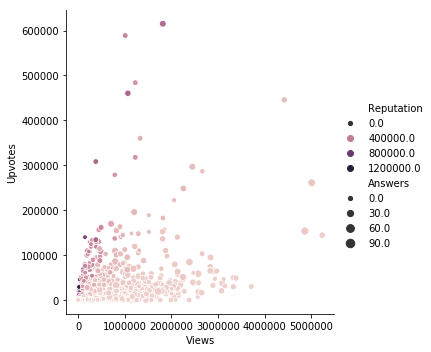

In [10]:
# Changing size
sns.relplot(x="Views", y="Upvotes", hue = "Reputation", size="Answers", data = df2)

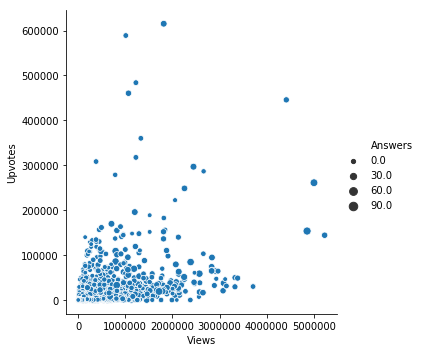

In [11]:
# Changing size
sns.relplot(x="Views", y="Upvotes", size="Answers", data = df2)

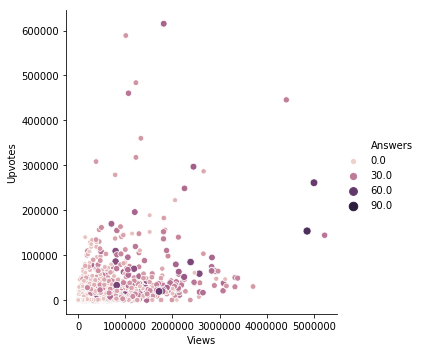

In [12]:
# Changing size
sns.relplot(x="Views", y="Upvotes", hue="Answers", size="Answers", data = df2)

### Categorical Jitter Plot

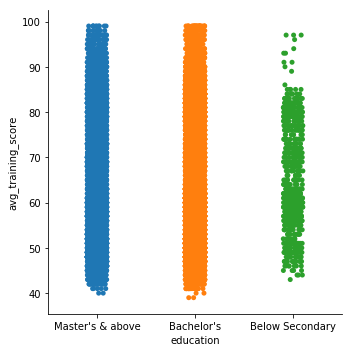

In [15]:
# with jitter as True
sns.catplot(x="education", y="avg_training_score", data=df1)

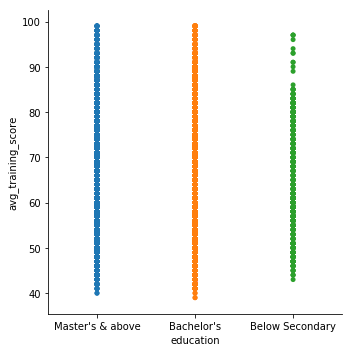

In [14]:
sns.catplot(x="education", y="avg_training_score",jitter=False, data=df1)

With `jitter=False`, we just need to see the value range of each category

### Categorical Swarm Plot

* It takes a while to generate the plot... at least on windows, this is true...
* With "swarm" plot, we cannot use `jitter` in the function

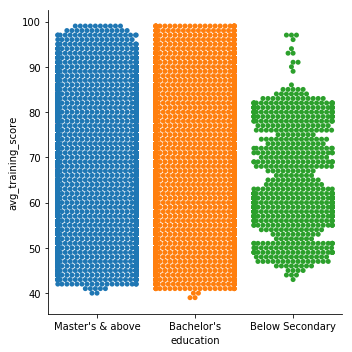

In [18]:
sns.catplot(x="education", y="avg_training_score", kind = "swarm", data=df1)

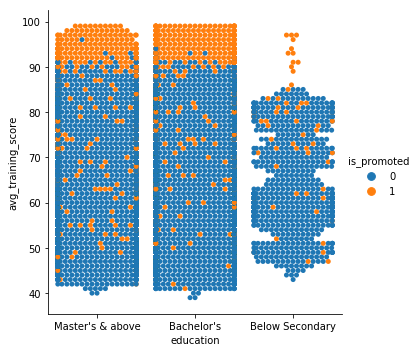

In [17]:
sns.catplot(x="education", y="avg_training_score", kind = "swarm", hue='is_promoted', data=df1)

What kind of HR training this is, higher score are are easier to get promoted.

### Boxplot

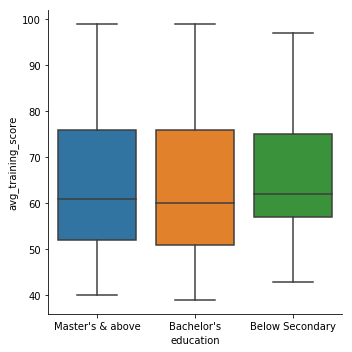

In [20]:
sns.catplot(x="education", y="avg_training_score", kind = "box", data=df1)

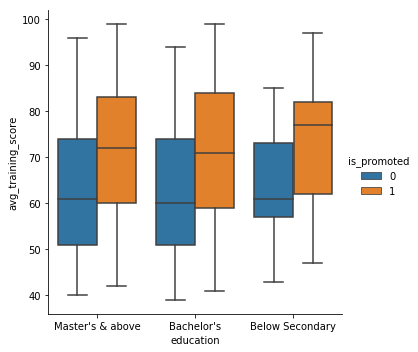

In [21]:
sns.catplot(x="education", y="avg_training_score", hue="is_promoted", kind="box", data=df1)

So, it seems that for people without a university degree, they need to get much higher training score so that thet can be promoted.

### Violin Plot

* The violin plots combine the boxplot and kernel density estimation procedure to provide richer description of the distribution of values. The quartile values are displayed inside the violin. 
* We can also split the violin when the hue semantic parameter has only two levels, which could also be helpful in saving space on the plot.

C:\Users\hanhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


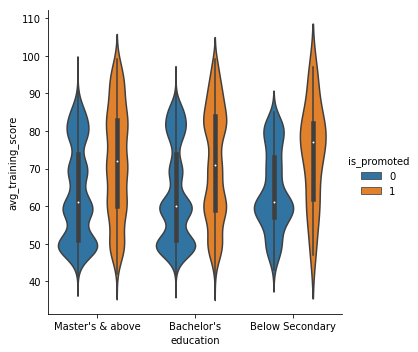

In [23]:
sns.catplot(x="education", y="avg_training_score", hue = "is_promoted", kind = "violin", data=df1)

C:\Users\hanhan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


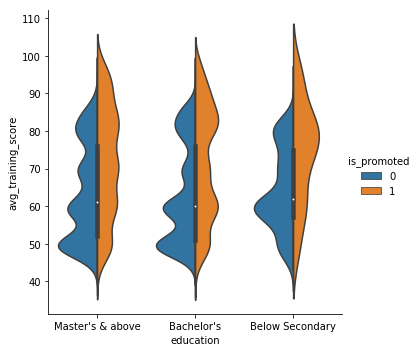

In [25]:
# Split the hue semantic parameter

sns.catplot(x="education", y="avg_training_score", hue = "is_promoted", kind = "violin", split = True, data=df1)